In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam  
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Dataset path
dataset_path = r"D:\mask\Face Mask Dataset 2022\Face_Mask_Dataset\Face_Mask_Dataset"

# Image parameters
img_width, img_height = 128, 128 
batch_size = 32 # no. of samples per batch

# Data generators for preprocessing and augmentation
train_datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2) # pixels value normalize to [0,1]

# preapreing training data generator
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_width, img_height), #resizing img to 128 pixesl
    batch_size=batch_size,
    class_mode='binary', #withmask or without mask
    subset='training' # 80% of data for traning
)

# preapreing training data generator
validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation' # 20% for validation
)
# CNN model for binary classification
model = Sequential([
    Input(shape=(img_width, img_height, 3)),  # Input layer (RGB image)
    Conv2D(32, (3, 3), activation='relu'),# first convolutional layer with 32 filters
    MaxPooling2D((2, 2)), #first max-pooling layer to reduce spatial dimensions
    Conv2D(64, (3, 3), activation='relu'), # 2nd convolutional layer with 64 filters
    MaxPooling2D((2, 2)), # 2nd maxpooling layer
    Flatten(), #flatten the 2D feature maps into a 1D vector
    Dense(128, activation='relu'), #fully connected layer with 128 neurons
    Dropout(0.5), #dropout layer to prevent overfit
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile the model with binary crossentropy loss
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy', 
              metrics=['accuracy'] #tracking accuracy during training
             )

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    verbose=1 #print logs detail during trainig
)


Found 16278 images belonging to 2 classes.
Found 4069 images belonging to 2 classes.
Epoch 1/10


D:\mask\env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


509/509 ━━━━━━━━━━━━━━━━━━━━ 88s 171ms/step - accuracy: 0.8508 - loss: 0.3677 - val_accuracy: 0.9624 - val_loss: 0.1030
Epoch 2/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 97s 191ms/step - accuracy: 0.9367 - loss: 0.1589 - val_accuracy: 0.9282 - val_loss: 0.1860
Epoch 3/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 95s 186ms/step - accuracy: 0.9472 - loss: 0.1355 - val_accuracy: 0.9703 - val_loss: 0.0769
Epoch 4/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 95s 187ms/step - accuracy: 0.9583 - loss: 0.1069 - val_accuracy: 0.9720 - val_loss: 0.0709
Epoch 5/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 96s 188ms/step - accuracy: 0.9718 - loss: 0.0714 - val_accuracy: 0.9698 - val_loss: 0.0868
Epoch 6/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 102s 200ms/step - accuracy: 0.9731 - loss: 0.0663 - val_accuracy: 0.9764 - val_loss: 0.0606
Epoch 7/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 100s 196ms/step - accuracy: 0.9814 - loss: 0.0515 - val_accuracy: 0.9789 - val_loss: 0.0587
Epoch 8/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 88s 172ms/step - accuracy: 0.9852 - loss: 0.0387 - v

In [7]:
# Function to plot training metrics
def plot_metrics(history, model_name):
    plt.figure(figsize=(12, 4))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()


In [4]:

# CNN model configurations using Input() layer
model_configs = [
    {
        "name": "CNN_Model_1",
        "architecture": [
            Input(shape=(img_width, img_height, 3)),  # input layer
            Conv2D(32, (3, 3), activation='relu'), # first convo layer
            MaxPooling2D((2, 2)), # max-pool layer
            Flatten(),
            Dense(64, activation='relu'),
            Dense(1, activation='sigmoid')  # Sigmoid for binary classification
        ]
    },
    {
        "name": "CNN_Model_2",
        "architecture": [
            Input(shape=(img_width, img_height, 3)),  
            Conv2D(32, (3, 3), activation='relu'),
            MaxPooling2D((2, 2)),
            Conv2D(64, (3, 3), activation='relu'),
            MaxPooling2D((2, 2)),
            Flatten(),
            Dense(128, activation='relu'),
            Dropout(0.5),
            Dense(1, activation='sigmoid')  
        ]
    },
    {
        "name": "CNN_Model_3",
        "architecture": [
            Input(shape=(img_width, img_height, 3)),  
            Conv2D(64, (3, 3), activation='relu'),
            MaxPooling2D((2, 2)),
            Conv2D(128, (3, 3), activation='relu'),
            MaxPooling2D((2, 2)),
            Flatten(),
            Dense(256, activation='relu'),
            Dropout(0.3),
            Dense(1, activation='sigmoid')  
        ]
    }
]



Training CNN_Model_1
Epoch 1/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 68s 132ms/step - accuracy: 0.8547 - loss: 0.5632 - val_accuracy: 0.9408 - val_loss: 0.1484
Epoch 2/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 69s 136ms/step - accuracy: 0.9465 - loss: 0.1394 - val_accuracy: 0.9629 - val_loss: 0.0916
Epoch 3/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 71s 139ms/step - accuracy: 0.9691 - loss: 0.0870 - val_accuracy: 0.9673 - val_loss: 0.0936
Epoch 4/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 69s 136ms/step - accuracy: 0.9832 - loss: 0.0549 - val_accuracy: 0.9656 - val_loss: 0.0985
Epoch 5/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 73s 144ms/step - accuracy: 0.9879 - loss: 0.0346 - val_accuracy: 0.9403 - val_loss: 0.2535
Epoch 6/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 73s 143ms/step - accuracy: 0.9917 - loss: 0.0264 - val_accuracy: 0.9641 - val_loss: 0.1245
Epoch 7/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 67s 132ms/step - accuracy: 0.9898 - loss: 0.0320 - val_accuracy: 0.9653 - val_loss: 0.1350
Epoch 8/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 70s 138ms/step - accu

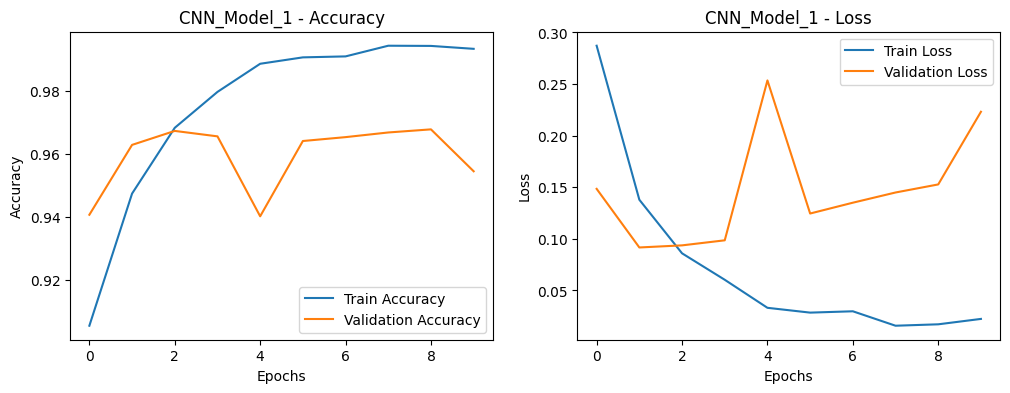

127/127 ━━━━━━━━━━━━━━━━━━━━ 9s 72ms/step - accuracy: 0.9529 - loss: 0.2410
CNN_Model_1 - Validation Loss: 0.2234, Validation Accuracy: 0.9545
127/127 ━━━━━━━━━━━━━━━━━━━━ 8s 61ms/step

CNN_Model_1 - Classification Report:
              precision    recall  f1-score   support

Without Mask       0.50      0.47      0.49      2021
   With Mask       0.51      0.54      0.52      2043

    accuracy                           0.51      4064
   macro avg       0.51      0.50      0.50      4064
weighted avg       0.51      0.51      0.50      4064



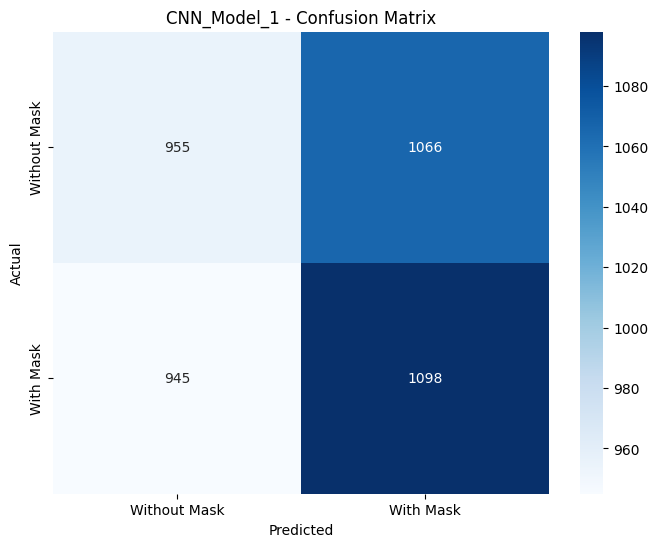


Training CNN_Model_2
Epoch 1/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 91s 177ms/step - accuracy: 0.8532 - loss: 0.4022 - val_accuracy: 0.9575 - val_loss: 0.1116
Epoch 2/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 89s 175ms/step - accuracy: 0.9347 - loss: 0.1659 - val_accuracy: 0.9668 - val_loss: 0.0847
Epoch 3/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 87s 172ms/step - accuracy: 0.9516 - loss: 0.1243 - val_accuracy: 0.9708 - val_loss: 0.0768
Epoch 4/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 90s 177ms/step - accuracy: 0.9651 - loss: 0.0948 - val_accuracy: 0.9708 - val_loss: 0.0870
Epoch 5/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 85s 167ms/step - accuracy: 0.9720 - loss: 0.0752 - val_accuracy: 0.9757 - val_loss: 0.0645
Epoch 6/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 90s 177ms/step - accuracy: 0.9790 - loss: 0.0571 - val_accuracy: 0.9703 - val_loss: 0.1008
Epoch 7/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 91s 179ms/step - accuracy: 0.9791 - loss: 0.0554 - val_accuracy: 0.9762 - val_loss: 0.0668
Epoch 8/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 92s 180ms/step - accu

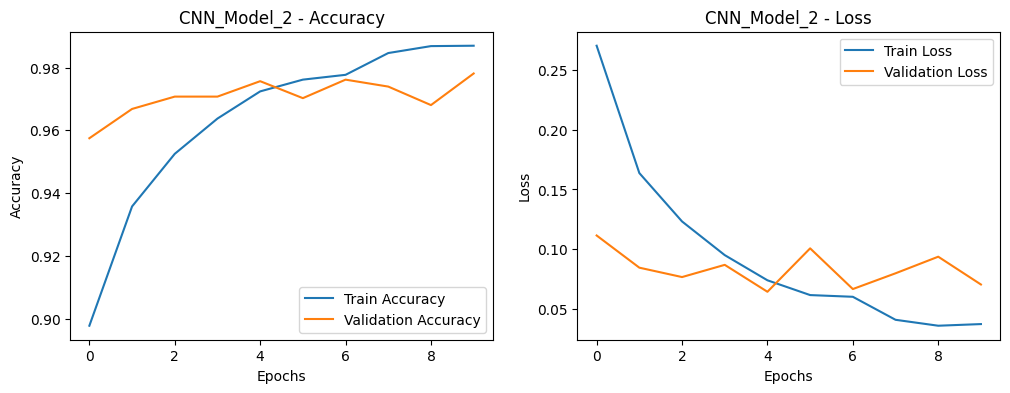

127/127 ━━━━━━━━━━━━━━━━━━━━ 8s 65ms/step - accuracy: 0.9801 - loss: 0.0675
CNN_Model_2 - Validation Loss: 0.0704, Validation Accuracy: 0.9783
127/127 ━━━━━━━━━━━━━━━━━━━━ 9s 67ms/step

CNN_Model_2 - Classification Report:
              precision    recall  f1-score   support

Without Mask       0.50      0.49      0.50      2021
   With Mask       0.51      0.52      0.52      2043

    accuracy                           0.51      4064
   macro avg       0.51      0.51      0.51      4064
weighted avg       0.51      0.51      0.51      4064



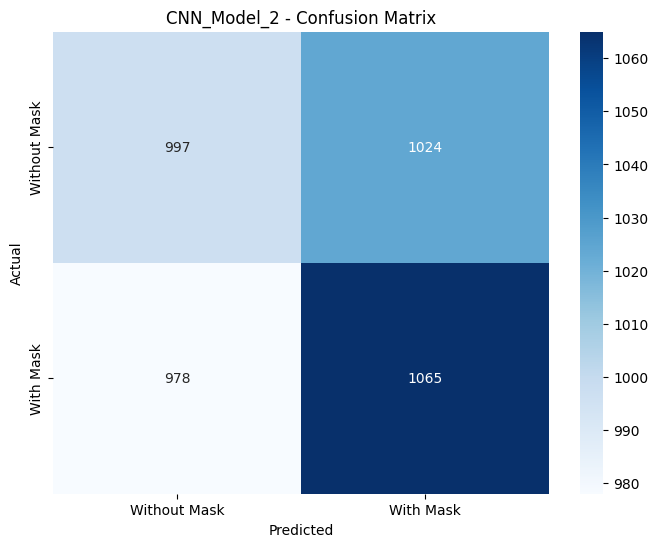


Training CNN_Model_3
Epoch 1/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 269s 526ms/step - accuracy: 0.8372 - loss: 0.4625 - val_accuracy: 0.9531 - val_loss: 0.1255
Epoch 2/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 340s 669ms/step - accuracy: 0.9266 - loss: 0.1831 - val_accuracy: 0.9651 - val_loss: 0.0909
Epoch 3/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 300s 589ms/step - accuracy: 0.9479 - loss: 0.1387 - val_accuracy: 0.9585 - val_loss: 0.1027
Epoch 4/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 292s 573ms/step - accuracy: 0.9626 - loss: 0.0977 - val_accuracy: 0.9656 - val_loss: 0.0870
Epoch 5/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 277s 544ms/step - accuracy: 0.9754 - loss: 0.0656 - val_accuracy: 0.9661 - val_loss: 0.0997
Epoch 6/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 287s 563ms/step - accuracy: 0.9773 - loss: 0.0618 - val_accuracy: 0.9739 - val_loss: 0.0728
Epoch 7/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 275s 540ms/step - accuracy: 0.9869 - loss: 0.0374 - val_accuracy: 0.9700 - val_loss: 0.0988
Epoch 8/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 276s 542ms/ste

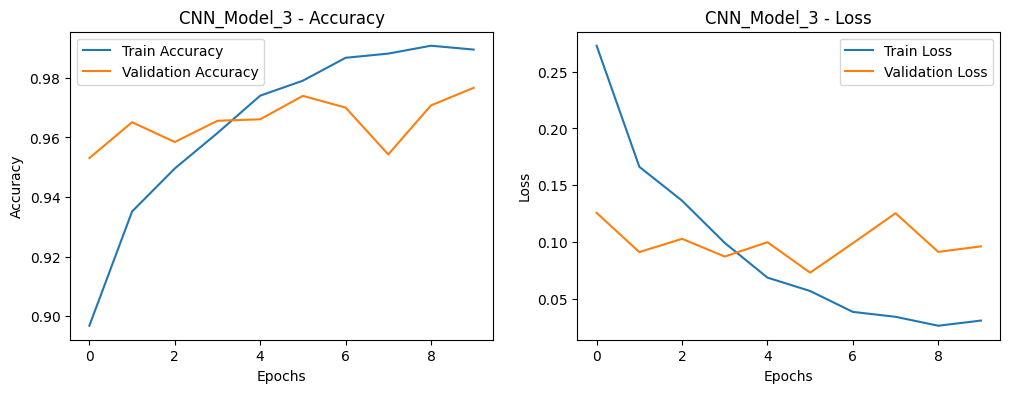

127/127 ━━━━━━━━━━━━━━━━━━━━ 15s 119ms/step - accuracy: 0.9762 - loss: 0.0950
CNN_Model_3 - Validation Loss: 0.0961, Validation Accuracy: 0.9766
127/127 ━━━━━━━━━━━━━━━━━━━━ 14s 110ms/step

CNN_Model_3 - Classification Report:
              precision    recall  f1-score   support

Without Mask       0.50      0.49      0.50      2021
   With Mask       0.50      0.51      0.50      2043

    accuracy                           0.50      4064
   macro avg       0.50      0.50      0.50      4064
weighted avg       0.50      0.50      0.50      4064



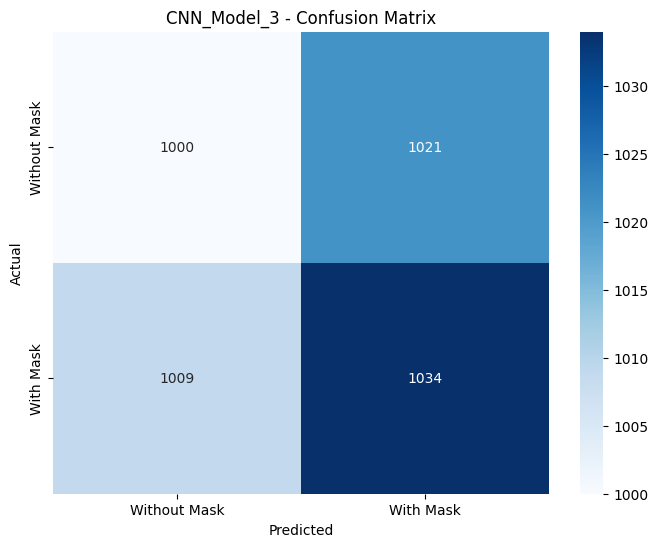

In [5]:
# Loop through each model configuration
for config in model_configs:
    print(f"\nTraining {config['name']}\n{'='*40}")
    
    # Build the model
    model = Sequential(config['architecture'])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    
    # Train the model
    history = model.fit(
        train_generator,
        epochs=10,
        validation_data=validation_generator,
        verbose=1
    )
    
    # Plot metrics
    plot_metrics(history, config["name"])
    
    # Evaluate the model
    val_steps = validation_generator.samples // batch_size
    val_loss, val_accuracy = model.evaluate(validation_generator, steps=val_steps)
    print(f"{config['name']} - Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

    # Classification report
    validation_generator.reset()
    y_pred = (model.predict(validation_generator, steps=val_steps) > 0.5).astype("int32")
    y_true = validation_generator.classes[:len(y_pred)]
    print(f"\n{config['name']} - Classification Report:")
    print(classification_report(y_true, y_pred, target_names=['Without Mask', 'With Mask']))
    
    # Confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Without Mask', 'With Mask'], yticklabels=['Without Mask', 'With Mask'])
    plt.title(f"{config['name']} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
